In [1]:
import pandas as pd
from collections import Counter
# import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
SURVEY_LOCATION='../../Data/Bản sao của data HIDS.xlsx'

# Data Cleaning

In [3]:
xls = pd.ExcelFile(SURVEY_LOCATION)

In [4]:
householders=pd.read_excel(xls, sheet_name='Form_01(Householdhead)', header=3)
all_members=pd.read_excel(xls, sheet_name='Form_02（ALLmember）', header=3)
range_hh=pd.read_excel(xls, sheet_name='Range(HouseholdHead)')
range_member=pd.read_excel(xls, sheet_name='Range(AllMember)')

Drop the first row under the header row

In [5]:
householders=householders.drop(0, axis=0)
all_members=all_members.drop(0, axis=0)

In [6]:
for q in range_hh['Question']:
    print(q)

Q1.Serial number
Q1.Name of surveyor
Q1.Neme of supervisor
Q1.Name of team leader
Q1.Name of Encoder
Q1.Date of survey
Q1.Date of survey
Q1.Date of trip surveyed
Q1.Date of trip surveyed
Q2.Have you ever participated household interview survey in 2002?
Q3.Name of house hold  head
Q4.house address
Q5.Can you or anybody currently present answer questions about the trips made by members of this household one (or two days ago)?
Q6.have telephone
Q6.telephone number
Q7.legitimacy of location of house
Q8.housing condition a. Ownership
Q8.housing condition b.floor area(m2)
Q8.housing condition c.Structure
Q8.housing condition d.Maintenance
Q8.housing condition e.Land use
Q9.if rented, how much
Q10.years stayed in present dwelling
Q11.address dwelling before
Q12.what kind of media  a. Newspaper
Q12.what kind of media b.TV
Q12.what kind of media c.Internet 
Q12.what kind of media d.Radio 
Q12.what kind of media  e.Community e.announcement
Q12.what kind of media f.Magagine
Q13.household member =

In [7]:
for c in all_members.columns:
    print(c)

Số 
Sêri
Q20a.Tên thành viên
Q20b.Mã thành viên
Q21.Thông tin cá nhân: Tuổi
Q21.Thông tin cá nhân: Giới tính 
Q22.Trình độ học vấn
Q23.Bạn có bằng lái của phương tiện nào?
Q24.Bạn có xe riêng không?
a.xe hơi
Q24.Bạn có xe riêng không?
b.xe máy
Q24.Bạn có xe riêng không?
c.xe đạp
Q24.Bạn có xe riêng không?
d.xe đạp điện
Q25. Nếu không sở hữu xe riêng, bạn đi lại bằng phương tiện gì?
Q26.Bị khiếm khuyết về thể chất hoặc tinh thần không?
Q27.Tình hình cư trú
a. Có phải chủ hộ không
Q27.Tình hình cư trú
b. Tình trạng đăng ký
Q27.Tình hình cư trú
c. Người giúp việc
Q28.Nghề nghiệp của bạn
Q29.Chỉ những người thuộc từ mục 1-10 của câu 28 mới trả lời, Lĩnh vực nghê nghiệp
Q30.Chỉ những người thuộc từ mục 1-10 của câu 28 mới trả lời (nghĩa là đang đi làm),Loại hình công ty mà bạn đang làm ?
Q31.Chỉ những người thuộc từ mục 1-10 của Q 28 mới trả lời,Tình trạng làm việc?
Q32.Nếu có thu nhập thì thu nhập cá nhân trung bình hàng tháng là bao nhiêu? (VNĐ/tháng)
Q33.Chỉ những người thuộc từ mục 1-12

Unnamed: 424
Unnamed: 425
Unnamed: 426
Unnamed: 427
Unnamed: 428
Unnamed: 429
Unnamed: 430
Unnamed: 431
Unnamed: 432
Unnamed: 433
Unnamed: 434
Unnamed: 435
Unnamed: 436
Unnamed: 437
Unnamed: 438
Unnamed: 439
Unnamed: 440
Unnamed: 441
Unnamed: 442
Unnamed: 443
Unnamed: 444
Unnamed: 445
Unnamed: 446
Unnamed: 447
Unnamed: 448
Unnamed: 449
Unnamed: 450
Unnamed: 451
Unnamed: 452
Unnamed: 453
Unnamed: 454
Unnamed: 455
Unnamed: 456
Unnamed: 457
Unnamed: 458
Unnamed: 459
Unnamed: 460
Unnamed: 461
Unnamed: 462
Unnamed: 463
Unnamed: 464
Unnamed: 465
Unnamed: 466
Unnamed: 467
Unnamed: 468
Unnamed: 469
Unnamed: 470
Unnamed: 471
Unnamed: 472
Unnamed: 473
Unnamed: 474
Unnamed: 475
Unnamed: 476
Unnamed: 477
Unnamed: 478
Unnamed: 479
Unnamed: 480
Unnamed: 481
Unnamed: 482
Unnamed: 483
Unnamed: 484
Unnamed: 485
Unnamed: 486
Unnamed: 487
Unnamed: 488
Unnamed: 489
Unnamed: 490
Unnamed: 491
Unnamed: 492
Unnamed: 493
Unnamed: 494
Unnamed: 495
Unnamed: 496
Unnamed: 497
Unnamed: 498
Unnamed: 499
Unnamed: 500

In [8]:
for q in range_member['Question']:
    print(q)

S/N
Q20a.Name
Q20b.member code
Q21.Personal data:age
Q21.Personal data:gender
Q22.Educational Attainment
Q23.Car and motorcycle driver's license
Q24.Do you personally have your own vehicles?
a.car
Q24.Do you personally have your own vehicles?
b.motorcycle
Q24.Do you personally have your own vehicles?
c.bicycle
Q24.Do you personally have your own vehicles?
d.Electric bicycle
Q25.If no, how do you manage to travel
Q26.Physical/mental challenged to travel
Q27.Residency Status a.Household head
Q27.Residency Status b.Registration status
Q27.Residency Status c.Employee of household
Q28.Occupation
Q29.If Q29 is 1-10(i.e.working), Field of Employment
Q30.If Q29 is 1-10(i.e.working), Type of company or employer?
Q31.If Q29 is 1-10(i.e.working), Employment status?
Q32.If earning, average monthly personal income(VND)
Q33.If Q29 is 1-12(i.e.working or studying), Work or School address?
Q34.If Q29 is 1-12(i.e.working/studying), Typical? FROM
Q34.If Q29 is 1-12(i.e.working/studying), Typical? FROM
Q

In [9]:
householders.groupby('Q1.Số Sêri').size()

Q1.Số Sêri
1        1
2        1
3        1
4        1
5        1
        ..
26948    1
26949    1
26950    1
27563    1
27877    1
Length: 20000, dtype: int64

In [10]:
all_members.groupby('Số \nSêri').size()

Số \nSêri
1.0        2
2.0        3
3.0        3
4.0        3
5.0        2
          ..
26948.0    2
26949.0    1
26950.0    4
27563.0    2
27877.0    4
Length: 20000, dtype: int64

'Q1.Số Sêri' in the household file and 'Số \nSêri' in the members file seem to indicate a serial number for households.

In [11]:
rename_cols_hh={'Q14.Tổng thu nhập hàng tháng của hộ gia đình là bao nhiêu (VNĐ/tháng)?': 'hh_income',
                'Q4.Địa chỉ nhà': 'home_address',
               'Q1.Số Sêri': 'serial_num'}
rename_cols_all={'Q29.Chỉ những người thuộc từ mục 1-10 của câu 28 mới trả lời, Lĩnh vực nghê nghiệp': 'career',
                 'Q33.Chỉ những người thuộc từ mục 1-12 của Q28 (nghĩa là đang đi học hoặc đi làm) thì mới trả lời, Địa chỉ nơi làm việc/ trường học?': 'work_school_address',
                 'Q35.Chỉ những người thuộc từ mục  1-12 của Q28  (nghĩa là đang đi học hoăc đi làm) thì mới trả lời,Phương tiện giao thông nào bạn thường sử dụng để đi lại hằng ngày ?': 'commute_mode',
                 'Q21.Thông tin cá nhân: Tuổi': 'age',
               'Số \nSêri': 'serial_num'}

In [12]:
householders=householders.rename(columns=rename_cols_hh)
all_members=all_members.rename(columns=rename_cols_all)

In [13]:
# income_group_totals=Counter(householders['hh_income'])
# income_group_totals_ordered=[income_group_totals[float(i)] for i in range(1, 16)]
# np.cumsum(income_group_totals_ordered)

### Join some household data to the all members sheets

In [14]:
all_members=all_members.merge(householders[['home_address', 'hh_income', 'serial_num']], 
                             left_on='serial_num', right_on='serial_num')

### Convert the Ward codes to be consistent with the shapefile using the mapping

In [15]:
code_mapping_df=pd.read_csv('../Data/GIS/Survey/ward_code_mapping.csv')

In [16]:
code_mapping_df.groupby('Com_ID').size().sort_values(ascending=False)

Com_ID
26740    3
27427    2
27433    2
26758    2
27139    2
        ..
27334    1
27331    1
27328    1
27325    1
25741    1
Length: 243, dtype: int64

Some survey codes map to the same ward code

In [17]:
code_mapping={row['Code_Zone']: row['Com_ID'] for ind, row in code_mapping_df.iterrows()}

In [18]:
for col in ['home_address', 'work_school_address']:
    all_members[col]=all_members.apply(lambda row: str(int(code_mapping[row[col]])) if row[col] in code_mapping else None, axis=1)

# Create the synthetic Population

### Map the income and career field categories to simpler CS categories 

Income groups 1 to 8 are roughly the bottom quartile <br>
Income groups 9 and 10 are 2nd and 3rd quartiles. <br>
Income groups 11 to 15 are the top quartile <br>

In [19]:
def get_simple_income_quantiles(row):
    if row['hh_income']<9:
        return '1'
    elif row['hh_income']==9:
        return '2'
    elif row['hh_income']==10:
        return '3'
    else:
        return '4'

In [20]:
all_members['hh_income']=all_members.apply(lambda row: get_simple_income_quantiles(row), axis=1)


In [21]:
all_members.groupby('hh_income').size()/len(all_members)

hh_income
1    0.262572
2    0.200806
3    0.273125
4    0.263497
dtype: float64

#### Map to NAICS codes: https://www.naics.com/search/
- TODO: revisit these with more precision. eg. career 6 seems to include retail as well as accommodation/food. career 10 should be a mix of multiple categories.'

In [22]:
field_to_naics={1: '11',
                2: '21',
                3: '23',
                4: '72',
                5: '92',
                6: '48-49',
                7: '52',
                8: '61',
                9: '62',
                10: '81'
               }

In [23]:
all_members['naics']=all_members.apply(lambda row: field_to_naics[int(row['career'])] if row['career']==row['career'] else None, axis=1)

In [24]:
simpop_df=all_members[['naics', 'hh_income', 'age', 'home_address', 'work_school_address']].rename(columns={'home_address': 'home_geoid',
                            'work_school_address': 'work_geoid',
                            'hh_income': 'earnings'})

In [25]:
simpop_df.dropna().to_csv('../outputs/simpop.csv', index=False)

### Create dummys for the income and field columns

In [26]:
income_dummys=pd.get_dummies(all_members['hh_income'], prefix='res_income')
career_dummys=pd.get_dummies(all_members['naics'], prefix='emp_naics')

In [27]:
for col in career_dummys.columns:
    all_members[col]=career_dummys[col]

In [28]:
for col in income_dummys.columns:
    all_members[col]=income_dummys[col]

# Fit Simple Mode Choice Model

## Add network distances

In [29]:
dist_mat=pd.read_csv('../outputs/zone_to_zone_dist_mat.csv', index_col=0)

Drop any rows where either home or work ward is not in the wards shape file (and therefore the distance matrix)

In [30]:
all_members=all_members.loc[((all_members['home_address'].isin(dist_mat.columns)) &
                       (all_members['work_school_address'].isin(dist_mat.columns)))]

In [31]:
all_members['distance']=None
for ind, row in all_members.iterrows():
    all_members.loc[ind,'distance']=dist_mat.loc[int(row['home_address']), row['work_school_address']]

In [32]:
mode_mapping={1: 'Motorcycle',
              2: 'Bicycle',
             3: 'Electric bicycle',
             4: 'Walking',
             5: 'Bus',
              6: 'Car',
             7: 'Others'}

In [33]:
all_members['commute_mode']=all_members.apply(lambda row: mode_mapping[int(row['commute_mode'])] 
                                              if row['commute_mode']==row['commute_mode'] else None, 
                                              axis=1)

In [34]:
Counter(all_members['commute_mode'])

Counter({'Motorcycle': 25059,
         'Walking': 2204,
         'Bicycle': 2596,
         'Others': 4400,
         'Bus': 1542,
         'Car': 196,
         'Electric bicycle': 306})

<AxesSubplot:xlabel='commute_mode', ylabel='distance'>

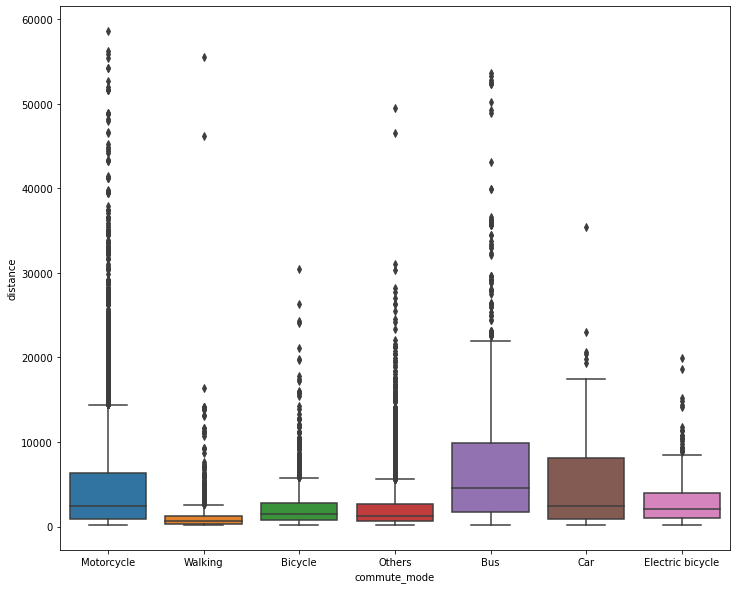

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.boxplot(x="commute_mode", y="distance", data=all_members.loc[all_members['distance']<1e6])

<AxesSubplot:xlabel='commute_mode', ylabel='age'>

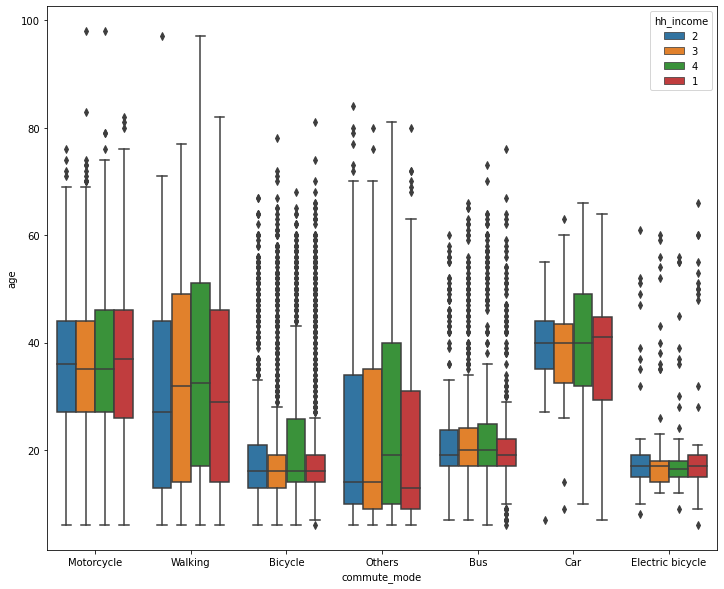

In [36]:
plt.figure(figsize=(12,10))
sns.boxplot(x="commute_mode", y="age", hue= 'hh_income', data=all_members.loc[all_members['distance']<1e6])

<AxesSubplot:xlabel='commute_mode', ylabel='age'>

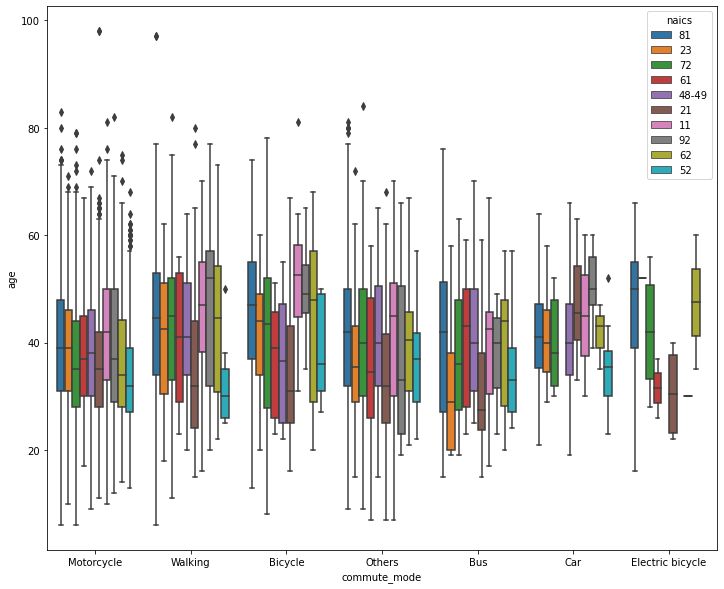

In [37]:
plt.figure(figsize=(12,10))
sns.boxplot(x="commute_mode", y="age", hue= 'naics', data=all_members.loc[all_members['distance']<1e6])

In [38]:
mode_data=all_members.loc[((~all_members['commute_mode'].isnull())&(all_members['distance']<1e6)), 
                          ['home_address', 'work_school_address', 'commute_mode', 'age', 'distance']+list(career_dummys.columns)+list(income_dummys.columns)]

In [39]:
mode_data=mode_data.dropna()

In [40]:
mode_order=list(mode_mapping.values())
mode_data['mode_id']=[mode_order.index(m) for m in mode_data['commute_mode']]

In [41]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

### Try Logistic Regression

In [42]:
# features=['age', 'distance']
lr_features=['age', 'distance']+list(career_dummys.columns)[:-1]+list(income_dummys.columns)[:-1]
lr_features

['age',
 'distance',
 'emp_naics_11',
 'emp_naics_21',
 'emp_naics_23',
 'emp_naics_48-49',
 'emp_naics_52',
 'emp_naics_61',
 'emp_naics_62',
 'emp_naics_72',
 'emp_naics_81',
 'res_income_1',
 'res_income_2',
 'res_income_3']

In [43]:
X=mode_data[lr_features]
y=mode_data['mode_id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [44]:
lr = LogisticRegression(random_state=0, multi_class='multinomial', fit_intercept=True,
                         max_iter=10000).fit(X_train, y_train)

In [45]:
# clf = LogisticRegression(random_state=0, multi_class='ovr', fit_intercept=True,
#                          max_iter=10000).fit(X_train, y_train)

#### Coefficients of LR model

In [46]:
coef=pd.DataFrame(lr.coef_)
coef.columns=lr_features
coef['intercept']=lr.intercept_
coef.index=mode_order
coef

,age,distance,emp_naics_11,emp_naics_21,emp_naics_23,emp_naics_48-49,emp_naics_52,emp_naics_61,emp_naics_62,emp_naics_72,emp_naics_81,res_income_1,res_income_2,res_income_3,intercept
Motorcycle,0.086815,0.000176,-0.003707,0.415997,0.277458,0.124405,0.213645,0.176978,0.095147,0.248579,0.154290,-0.577162,-0.221257,0.073961,-0.389837
Bicycle,0.000059,-0.000011,-0.014213,-0.107009,-0.061577,-0.066264,-0.053640,-0.041661,-0.025833,-0.089402,-0.208231,0.343824,0.138906,0.058663,0.397184
Electric bicycle,-0.063348,-0.000003,-0.003600,-0.014123,-0.003774,-0.005579,-0.004362,-0.000757,-0.000593,-0.007641,-0.002956,-0.055184,-0.027204,-0.047935,-0.127196
Walking,0.043888,-0.000423,0.044856,-0.019062,-0.066586,-0.058592,-0.032222,-0.036787,-0.008891,-0.006283,-0.000986,0.117310,0.023437,-0.091766,-0.123803
Bus,-0.019871,0.000218,-0.009774,-0.071801,-0.033302,-0.028478,-0.035418,-0.010151,-0.010395,-0.044816,-0.084209,0.020151,-0.080978,-0.080078,-0.238141
Car,-0.048177,0.000041,-0.000226,-0.015022,0.001974,0.097910,0.014144,-0.005326,-0.000403,0.003631,-0.014218,-0.143206,-0.097594,-0.134021,-0.367077
Others,0.000635,0.000002,-0.013336,-0.188981,-0.114192,-0.063403,-0.102149,-0.082295,-0.049033,-0.104068,0.156311,0.294266,0.264690,0.221176,0.848871


#### Simple Prediction

In [47]:
y_pred=lr.predict(X_test)

conf_mat=pd.DataFrame(confusion_matrix(y_test, y_pred))
conf_mat.index=pd.Index(mode_order, name='True')
conf_mat.columns=pd.Index(mode_order, name='Predicted')
conf_mat

Predicted,Motorcycle,Bicycle,Electric bicycle,Walking,Bus,Car,Others
True,,,,,,,
Motorcycle,4889,0,0,0,1,0,100
Bicycle,299,0,0,0,1,0,237
Electric bicycle,45,0,0,0,0,0,13
Walking,334,0,0,0,0,0,131
Bus,223,0,0,0,1,0,57
Car,37,0,0,0,0,0,0
Others,441,0,0,0,5,0,355


#### Probabilistic Prediction

In [48]:
y_pred_proba=lr.predict_proba(X_test)
y_pred=[np.random.choice(range(len(y_pred_proba[i])), size=1, replace=True, p=y_pred_proba[i]
                        )[0] for i in range(len(y_pred_proba))]
conf_mat=pd.DataFrame(confusion_matrix(y_test, y_pred))
conf_mat.index=pd.Index(mode_order, name='True')
conf_mat.columns=pd.Index(mode_order, name='Predicted')
conf_mat

Predicted,Motorcycle,Bicycle,Electric bicycle,Walking,Bus,Car,Others
True,,,,,,,
Motorcycle,3821,226,28,274,169,26,446
Bicycle,234,79,14,39,40,13,118
Electric bicycle,28,10,3,2,5,0,10
Walking,251,45,10,53,23,6,77
Bus,159,24,4,19,27,6,42
Car,30,1,0,1,2,0,3
Others,352,82,35,66,68,23,175


In [49]:
print(conf_mat.sum(axis=0))
print(conf_mat.sum(axis=1))

Predicted
Motorcycle          4875
Bicycle              467
Electric bicycle      94
Walking              454
Bus                  334
Car                   74
Others               871
dtype: int64
True
Motorcycle          4990
Bicycle              537
Electric bicycle      58
Walking              465
Bus                  281
Car                   37
Others               801
dtype: int64


#### See how predictions for all data vary with the main variables

In [50]:
y_pred_proba=lr.predict_proba(X)
y_pred=[np.random.choice(range(len(y_pred_proba[i])), size=1, replace=True, p=y_pred_proba[i]
                        )[0] for i in range(len(y_pred_proba))]
mode_data['predicted_mode']=y_pred

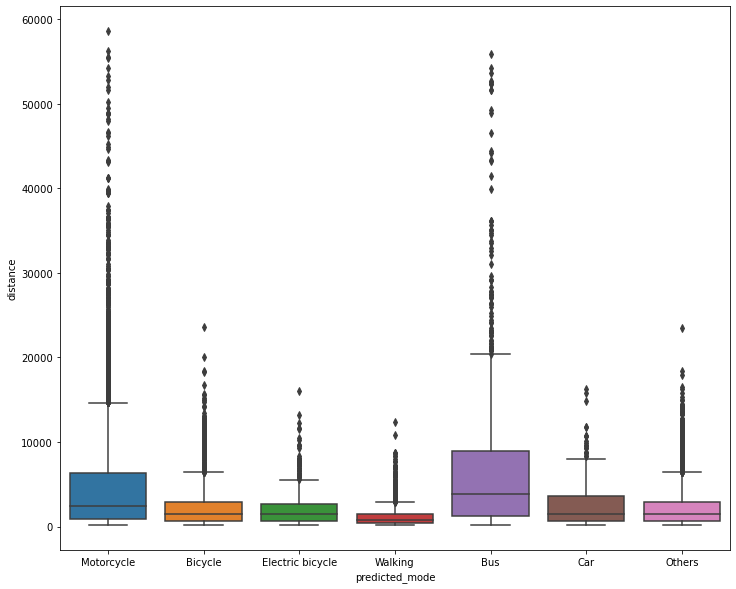

In [51]:
plt.figure(figsize=(12,10))
g=sns.boxplot(x="predicted_mode", y="distance", data=mode_data)
_=g.set_xticklabels(mode_order)

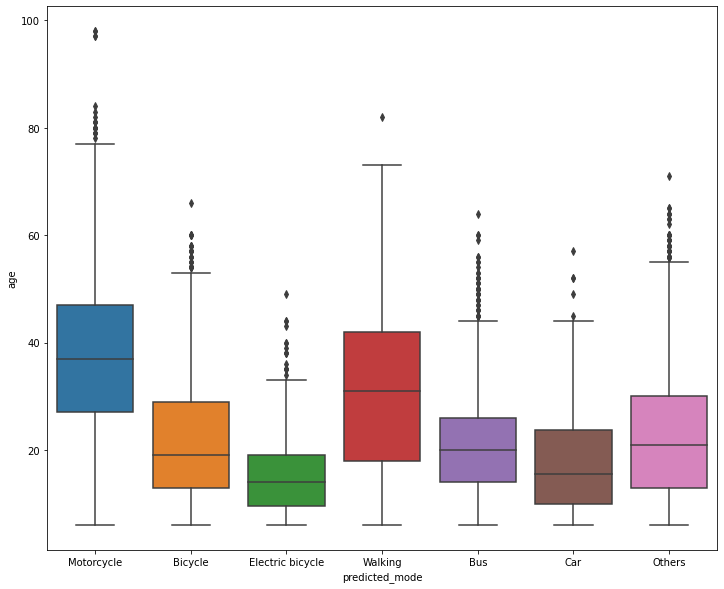

In [52]:
plt.figure(figsize=(12,10))
g=sns.boxplot(x="predicted_mode", y="age", data=mode_data)
_=g.set_xticklabels(mode_order)

### Try Random Forest

In [53]:
# features=['age', 'distance']+list(career_dummys.columns)[:-1]+list(income_dummys.columns)[:-1]
# features

In [54]:
# rf = RandomForestClassifier(n_estimators=100)

# # Create the parameter ranges
# maxDepth = list(range(1,10,1)) # Maximum depth of tree
# maxDepth.append(None)
# minSamplesSplit = range(2,22,5) # Minimum samples required to split a node
# minSamplesLeaf = range(1,11,5) # Minimum samples required at each leaf node

# #Create the grid
# randomGrid = {
#                'max_depth': maxDepth,
#                'min_samples_split': minSamplesSplit,
#                'min_samples_leaf': minSamplesLeaf}

# # Create the random search object
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = randomGrid,
#                               n_iter = 64, cv = 5, verbose=2, random_state=0, 
#                               refit=True)

# # Perform the random search and find the best parameter set
# rf_random.fit(X_train, y_train)
# rf_winner=rf_random.best_estimator_
# best_params=rf_random.best_params_
# print(best_params)

In [55]:
# features=X.columns

# importances = rf_winner.feature_importances_
# std = np.std([tree.feature_importances_ for tree in rf_winner.estimators_],
#              axis=0)
# indices = np.argsort(importances)[::-1]
# print("Feature ranking:")

# for f in range(len(features)):
#     print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

# # Plot the feature importances of the forest
# plt.figure(figsize=(16, 9))
# plt.title("Feature importances")
# plt.bar(range(len(importances)), importances[indices],
#        color="r", yerr=std[indices], align="center")
# plt.xticks(range(len(features)), [features[i] for i in indices], rotation=90, fontsize=15)
# plt.xlim([-1, len(features)])
# plt.show()

In [56]:
# y_pred=rf_winner.predict(X_test)

In [57]:
# conf_mat=pd.DataFrame(confusion_matrix(y_test, y_pred))
# conf_mat.index=pd.Index(mode_order, name='True')
# conf_mat.columns=pd.Index(mode_order, name='Predicted')
# conf_mat

In [58]:
# print(conf_mat.sum(axis=0))
# print(conf_mat.sum(axis=1))

### Use the Logistic Regression Model

In [59]:
import pickle
import json
dummy_map_lr={'earnings': 'res_income', 'naics': 'emp_naics'} 
# map from attributed in snythpop to prefix of dummy
pickle.dump(lr, open('../outputs/mode_choice_model.p', 'wb'))
json.dump({'features': lr_features, 'mode_order':mode_order, 
           'dummy_map': dummy_map_lr
          }, open('../outputs/mc_model_features.json', 'w'))

# Perform Aggregations

In [68]:
by_home_area_income=all_members.groupby('home_address')[income_dummys.columns].sum()

In [69]:
by_home_area_income

,res_income_1,res_income_2,res_income_3,res_income_4
home_address,,,,
25741.0,127.0,55.0,73.0,42.0
25744.0,229.0,107.0,152.0,105.0
25759.0,31.0,43.0,35.0,28.0
25765.0,143.0,51.0,65.0,35.0
25942.0,364.0,333.0,323.0,146.0
...,...,...,...,...
28027.0,108.0,30.0,4.0,7.0
28111.0,248.0,89.0,94.0,24.0
28159.0,140.0,73.0,86.0,46.0


In [70]:
by_work_area_field=all_members.groupby('work_school_address')[career_dummys.columns].sum()

In [71]:
by_work_area_field

,emp_naics_11,emp_naics_21,emp_naics_23,emp_naics_48-49,emp_naics_52,emp_naics_61,emp_naics_62,emp_naics_72,emp_naics_81,emp_naics_92
work_school_address,,,,,,,,,,
25741.0,15.0,35.0,18.0,10.0,6.0,16.0,8.0,18.0,85.0,15.0
25744.0,14.0,60.0,17.0,21.0,9.0,12.0,2.0,37.0,101.0,23.0
25759.0,6.0,10.0,8.0,5.0,2.0,7.0,3.0,0.0,27.0,2.0
25765.0,13.0,29.0,12.0,9.0,6.0,7.0,3.0,8.0,101.0,9.0
25942.0,13.0,331.0,37.0,46.0,16.0,23.0,16.0,62.0,312.0,33.0
...,...,...,...,...,...,...,...,...,...,...
28027.0,9.0,10.0,7.0,2.0,3.0,4.0,1.0,13.0,10.0,2.0
28111.0,45.0,56.0,21.0,11.0,0.0,5.0,3.0,28.0,78.0,4.0
28159.0,9.0,26.0,13.0,5.0,0.0,6.0,4.0,1.0,107.0,4.0


### Scale up survey data to actual population

In [72]:
by_home_area_income*=100
by_work_area_field*=100

### Calculate Totals

In [73]:
by_home_area_income['res_total']=by_home_area_income.sum(axis=1)
by_work_area_field['emp_total']=by_work_area_field.sum(axis=1)

In [74]:
by_home_area_income.to_csv('../outputs/by_home_area_income.csv')
by_work_area_field.to_csv('../outputs/by_work_area_field.csv')

## Add aggregated demographic data to the shapefile of wards

In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
by_home_area_income=pd.read_csv('../outputs/by_home_area_income.csv', index_col=0)
by_work_area_field=pd.read_csv('../outputs/by_work_area_field.csv', index_col=0)

In [3]:
population=gpd.read_file('../Data/GIS/Population/population_HCMC/population_shapefile/Population_Ward_Level.shp')

In [7]:
by_home_area_income.index=[str(int(i)) for i in  by_home_area_income.index]
by_work_area_field.index=[str(int(i)) for i in  by_work_area_field.index]

In [75]:
# Aggregate the ones with the same ward code

In [8]:
# by_home_geoid_income=by_home_area_income.groupby('GEOID').sum()
# by_work_geoid_field=by_work_area_field.groupby('GEOID').sum()

In [9]:
by_home_geoid_income=by_home_geoid_income.drop(-1)
by_work_geoid_field=by_work_geoid_field.drop(-1)

In [10]:
by_home_geoid_income

,res_income_1,res_income_2,res_income_3,res_income_4,res_total
GEOID,,,,,
25741,12700.0,5500.0,7300.0,4200.0,29700.0
25744,22900.0,10700.0,15200.0,10500.0,59300.0
25759,3100.0,4300.0,3500.0,2800.0,13700.0
25765,14300.0,5100.0,6500.0,3500.0,29400.0
25942,36400.0,33300.0,32300.0,14600.0,116600.0
...,...,...,...,...,...
28027,10800.0,3000.0,400.0,700.0,14900.0
28111,24800.0,8900.0,9400.0,2400.0,45500.0
28159,14000.0,7300.0,8600.0,4600.0,34500.0


In [11]:
by_home_geoid_income.sum()

res_income_1    1589900.0
res_income_2    1215700.0
res_income_3    1653800.0
res_income_4    1595500.0
res_total       6054900.0
dtype: float64

In [12]:
population['GEOID']=population['Com_ID'].astype(str)

In [13]:
population=population.set_index('GEOID')

In [14]:
zones=population.merge(by_home_geoid_income, left_index=True, right_index=True, how='left')

In [15]:
zones=zones.merge(by_work_geoid_field, left_index=True, right_index=True, how='left')

In [16]:
centroids=zones['geometry'].centroid
zones['x_centroid']=[c.x for c in centroids]
zones['y_centroid']=[c.y for c in centroids]

In [17]:
zones['sim_area']=zones['Dist_Name']=='District 4'
zones['model_area']=True
zones['reference_area']=zones['Dist_Name']=='District 4'

In [18]:
zones=zones.rename(columns={'Shape_Area': 'area'})

In [19]:
zones=zones.to_crs('EPSG:4326')

<AxesSubplot:>

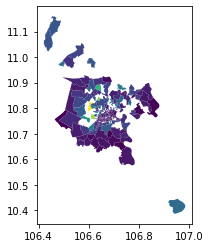

In [20]:
zones.plot(column='res_total')

<AxesSubplot:>

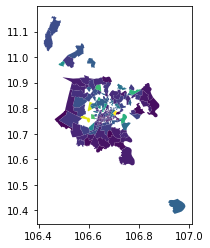

In [21]:
zones.plot(column='emp_total')

### TODO: estimate the attributes of the areas with no data

In [22]:
zones.to_file('../outputs/zones.geojson', driver='GeoJSON')